In [2]:
import numpy as np
import pandas as pd
import os, os.path, shutil
import matplotlib.pyplot as plt

### 날씨 데이터

In [4]:
!wget --no-check-certificate https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip -O jena_climate.zip

--2023-12-09 04:48:49--  https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.104.166, 52.216.251.6, 52.217.65.126, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.104.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13565642 (13M) [application/zip]
Saving to: ‘jena_climate.zip’

jena_climate.zip    100%[===================>]  12.94M  7.06MB/s    in 1.8s    

2023-12-09 04:48:52 (7.06 MB/s) - ‘jena_climate.zip’ saved [13565642/13565642]



In [5]:
!unzip jena_climate.zip

Archive:  jena_climate.zip
  inflating: jena_climate_2009_2016.csv  
  inflating: __MACOSX/._jena_climate_2009_2016.csv  


In [6]:
df = pd.read_csv('./jena_climate_2009_2016.csv')

In [7]:
df[:3]

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6


In [12]:
x = df.drop('Date Time',axis=1).values

In [13]:
x[:3]

array([[ 9.96520e+02, -8.02000e+00,  2.65400e+02, -8.90000e+00,
         9.33000e+01,  3.33000e+00,  3.11000e+00,  2.20000e-01,
         1.94000e+00,  3.12000e+00,  1.30775e+03,  1.03000e+00,
         1.75000e+00,  1.52300e+02],
       [ 9.96570e+02, -8.41000e+00,  2.65010e+02, -9.28000e+00,
         9.34000e+01,  3.23000e+00,  3.02000e+00,  2.10000e-01,
         1.89000e+00,  3.03000e+00,  1.30980e+03,  7.20000e-01,
         1.50000e+00,  1.36100e+02],
       [ 9.96530e+02, -8.51000e+00,  2.64910e+02, -9.31000e+00,
         9.39000e+01,  3.21000e+00,  3.01000e+00,  2.00000e-01,
         1.88000e+00,  3.02000e+00,  1.31024e+03,  1.90000e-01,
         6.30000e-01,  1.71600e+02]])

In [14]:
len(x)

420451

In [15]:
f = open('jena_climate_2009_2016.csv')
data = f.read()
f.close()

In [16]:
lines = data.split('\n')

In [17]:
header = lines[0].split(',')

In [18]:
lines = lines[1:]
print(header)

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']


In [19]:
len(lines)

420451

In [21]:
x = np.zeros((len(lines), len(header)-1))
x.shape

(420451, 14)

In [22]:
for i, line in enumerate(lines):
  values = [ float(x) for x in line.split(',')[1:]]
  x[i,:] = values

In [23]:
x[:3]

array([[ 9.96520e+02, -8.02000e+00,  2.65400e+02, -8.90000e+00,
         9.33000e+01,  3.33000e+00,  3.11000e+00,  2.20000e-01,
         1.94000e+00,  3.12000e+00,  1.30775e+03,  1.03000e+00,
         1.75000e+00,  1.52300e+02],
       [ 9.96570e+02, -8.41000e+00,  2.65010e+02, -9.28000e+00,
         9.34000e+01,  3.23000e+00,  3.02000e+00,  2.10000e-01,
         1.89000e+00,  3.03000e+00,  1.30980e+03,  7.20000e-01,
         1.50000e+00,  1.36100e+02],
       [ 9.96530e+02, -8.51000e+00,  2.64910e+02, -9.31000e+00,
         9.39000e+01,  3.21000e+00,  3.01000e+00,  2.00000e-01,
         1.88000e+00,  3.02000e+00,  1.31024e+03,  1.90000e-01,
         6.30000e-01,  1.71600e+02]])

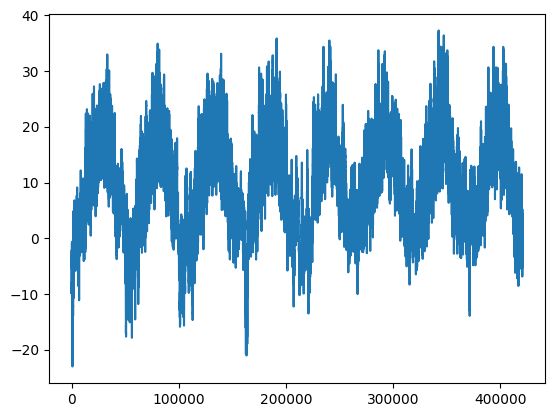

In [25]:
temp = x[:,1]
plt.plot(range(len(temp)), temp)
plt.show()

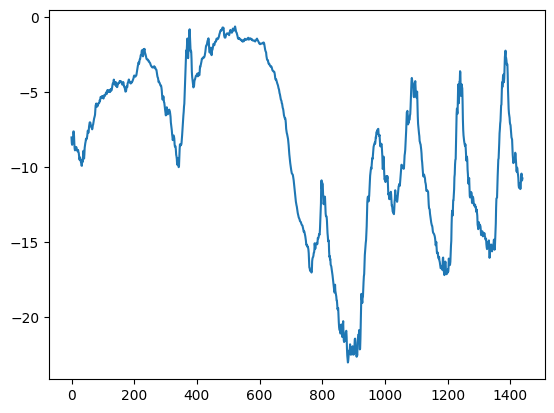

In [26]:
plt.plot(range(1440), temp[:1440])
plt.show()

In [37]:
mean = x[:20000].mean(axis=0)
std = x[:20000].std(axis=0)

In [32]:
x[:,1].mean(axis=0)

9.44856687223957

In [35]:
x -= mean

In [38]:
x /=std

In [39]:
std, mean

(array([10.43698592,  7.64456982,  7.82804682,  5.96853777, 15.88586242,
         5.15402052,  2.68174274,  3.33775969,  1.70035661,  2.71840314,
        39.66767543,  1.46425765,  2.24213234, 89.21949358]),
 array([ 3.11979420e-12,  7.15838944e-14,  2.23093934e-12,  3.06787484e-14,
        -1.50622981e-13,  1.09760379e-13,  1.55955249e-15,  1.28666855e-14,
        -3.25150129e-14, -1.42926559e-14,  4.63040806e-12,  2.04424255e-14,
         4.07286049e-13,  3.31432659e-13]))

## 제너레이터 : 모든 데이터를 메모리에 로드하지 않고 필요한 만큼씩만 가져오기 위한 방법
### 제너레이터는 (samples, target)형태의 값을 생성한다. sample은 입력의 한 배치를 나타냄

### data : 스케일링 된 데이터
### looback : 과거의 몇개 탐스텝을 사용할지 지정
### delay : 미래 몇 타임 스텝후를 예측할지 지정
### min_index, max_index : 검증 및 테스트 데이터를 구분하는 경계를 표시
### shuffle : 샘플을 랜덤 여부
### batch_zise : 배치크기
### step : 샘플 데이터를 취할 타임스텝 수

In [55]:
def generator(data, lookback, delay, min_index, max_index, shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows),
                           lookback // step,
                           data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets

In [44]:
lookback = 1440 # 10일간 데이터 - 10분간 6개 * 24시간 * 10일
step = 6 # 6회 즉, 1시간마다 한번 샘플링
delay =144 # 24시간 후를 예측
batch_size = 128 # 128개씩 처리

In [56]:


train_gen = generator(x,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      step=step,
                      batch_size=batch_size)
val_gen = generator(x,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=300000,
                    step=step,
                    batch_size=batch_size)
test_gen = generator(x,
                     lookback=lookback,
                     delay=delay,
                     min_index=300001,
                     max_index=None,
                     step=step,
                     batch_size=batch_size)

val_steps = (300000 - 200001 - lookback) // batch_size
test_steps = (len(x) - 300001 - lookback) // batch_size

In [52]:
test_steps

929

In [57]:
def evaluate_naive_method():
    batch_maes = []
    for step in range(val_steps):
        samples, targets = next(val_gen)
        preds = samples[:, -1, 1]
        mae = np.mean(np.abs(preds - targets))
        batch_maes.append(mae)
    print(np.mean(batch_maes))

evaluate_naive_method()

0.33551756286169604


### 신경망 모델

In [58]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Flatten(input_shape=(lookback // step, x.shape[-1])))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3360)              0         
                                                                 
 dense (Dense)               (None, 32)                107552    
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 107585 (420.25 KB)
Trainable params: 107585 (420.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [59]:
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/20


<ipython-input-59-c4242a3c1902>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_gen,


500/500 [==============================] - 19s 36ms/step - loss: 0.9862 - val_loss: 0.5853
Epoch 2/20
500/500 [==============================] - 19s 38ms/step - loss: 0.4093 - val_loss: 0.3904
Epoch 3/20
500/500 [==============================] - 19s 37ms/step - loss: 0.3167 - val_loss: 0.3784
Epoch 4/20
500/500 [==============================] - 17s 35ms/step - loss: 0.2914 - val_loss: 0.3928
Epoch 5/20
500/500 [==============================] - 18s 36ms/step - loss: 0.2743 - val_loss: 0.4058
Epoch 6/20
500/500 [==============================] - 16s 33ms/step - loss: 0.2624 - val_loss: 0.4089
Epoch 7/20
500/500 [==============================] - 19s 37ms/step - loss: 0.2550 - val_loss: 0.4195
Epoch 8/20
500/500 [==============================] - 18s 37ms/step - loss: 0.2473 - val_loss: 0.4647
Epoch 9/20
500/500 [==============================] - 20s 40ms/step - loss: 0.2424 - val_loss: 0.3929
Epoch 10/20
500/500 [==============================] - 26s 52ms/step - loss: 0.2370 - val_los

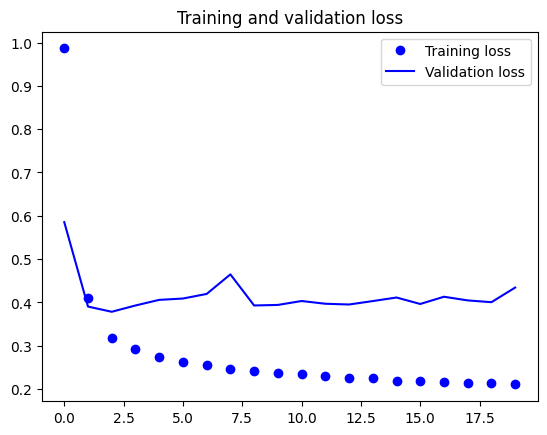

In [60]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### RNN모델

In [61]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32, input_shape=(None, x.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

<ipython-input-61-bd4b90626cfe>:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_gen,


Epoch 1/20
500/500 [==============================] - 107s 207ms/step - loss: 0.3556 - val_loss: 0.3185
Epoch 2/20
500/500 [==============================] - 110s 220ms/step - loss: 0.3297 - val_loss: 0.3089
Epoch 3/20
500/500 [==============================] - 103s 206ms/step - loss: 0.3217 - val_loss: 0.3063
Epoch 4/20
500/500 [==============================] - 102s 205ms/step - loss: 0.3153 - val_loss: 0.3042
Epoch 5/20
500/500 [==============================] - 103s 205ms/step - loss: 0.3096 - val_loss: 0.3083
Epoch 6/20
500/500 [==============================] - 102s 205ms/step - loss: 0.3049 - val_loss: 0.3032
Epoch 7/20
500/500 [==============================] - 102s 205ms/step - loss: 0.2994 - val_loss: 0.3049
Epoch 8/20
500/500 [==============================] - 103s 205ms/step - loss: 0.2933 - val_loss: 0.3069
Epoch 9/20
500/500 [==============================] - 103s 205ms/step - loss: 0.2891 - val_loss: 0.3079
Epoch 10/20
500/500 [==============================] - 102s 205m

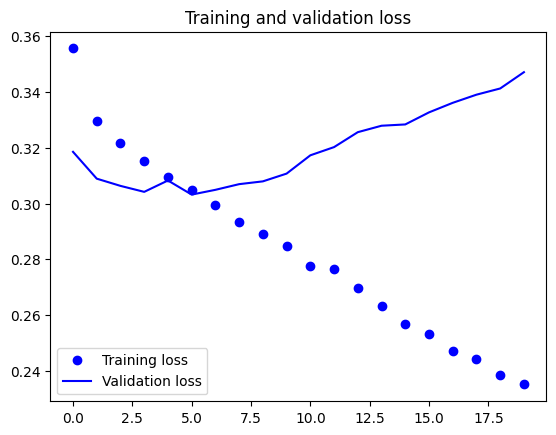

In [62]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()